In [14]:
# setup
from mlwpy import *
%matplotlib inline

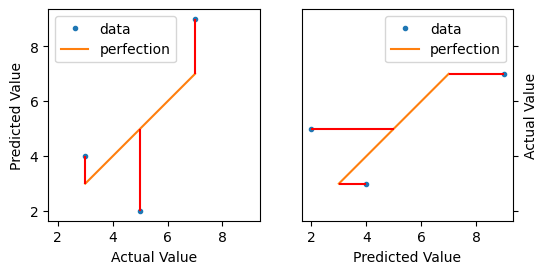

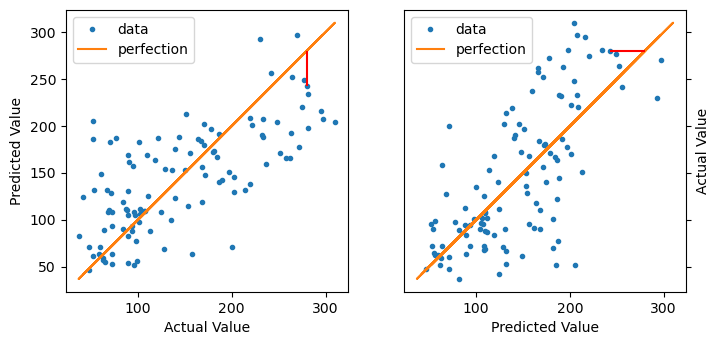

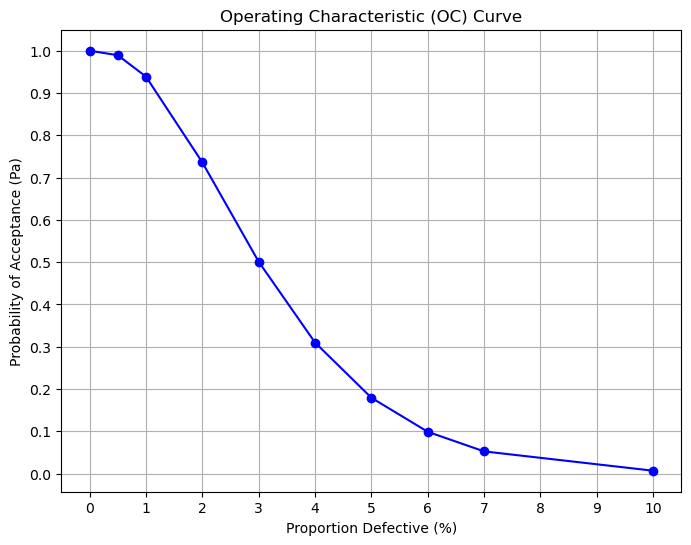

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial

# Function to calculate the probability of acceptance (Pa) using Poisson approximation
def poisson_pa(c, n, p):
    np_value = n * p
    pa = sum(((np_value ** i) * exp(-np_value)) / factorial(i) for i in range(c + 1))
    return pa

# Parameters
n = 89  # Sample size
c = 2   # Acceptance number

# Proportions of defectives (p) to use for OC curve
proportions = np.array([0.00, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.10])

# Calculate Pa for each proportion
pa_values = [poisson_pa(c, n, p) for p in proportions]

table = pd.DataFrame({"p": proportions, "Pa": pa_values})

table

# Plot the OC curve
plt.figure(figsize=(8, 6))
plt.plot(proportions * 100, pa_values, marker='o', linestyle='-', color='b')
plt.title('Operating Characteristic (OC) Curve')
plt.xlabel('Proportion Defective (%)')
plt.ylabel('Probability of Acceptance (Pa)')
plt.grid(True)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial

# Function to calculate the probability of acceptance (Pa) using Poisson approximation
def poisson_pa(c, n, p):
    np_value = n * p
    pa = sum(((np_value ** i) * exp(-np_value)) / factorial(i) for i in range(c + 1))
    return pa

# Parameters
n = 89  # Sample size
c = 2   # Acceptance number
N = 1000  # Lot size

# Proportions of defectives (p) to use for AOQ calculation
proportions = np.array([0.00, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.10])

# Calculate Pa for each proportion
pa_values = [poisson_pa(c, n, p) for p in proportions]

# Calculate AOQ for each proportion
aoq_values = [(pa * p * (N - n) / N) for pa, p in zip(pa_values, proportions)]

# Find the AOQL (maximum AOQ)
aoql = max(aoq_values)

table = pd.DataFrame({"p": proportions, "Pa": pa_values, "AOQ": aoq_values})

table


,p,Pa,AOQ
0,0.0000,1.0000,0.0000
1,0.0050,0.9894,0.0045
2,0.0100,0.9388,0.0086
3,0.0200,0.7360,0.0134
4,0.0300,0.5010,0.0137
5,0.0400,0.3099,0.0113
6,0.0500,0.1793,0.0082
7,0.0600,0.0988,0.0054
8,0.0700,0.0525,0.0033
9,0.1000,0.0068,0.0006


In [17]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,
columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2
149,5.9000,3.0000,5.1000,1.8000,2


In [18]:
sns.pairplot(iris_df, hue='target', height=2.5)

In [19]:
print('targets: {}'.format(iris.target_names),
iris.target_names[0], sep="\n")

targets: ['setosa' 'versicolor' 'virginica']
setosa


In [20]:
# simple train-test split
(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt,
iris_test_tgt) = skms.train_test_split(iris.data,
iris.target,
test_size=.25)
print("Train features shape:", iris_train_ftrs.shape)
print("Test features shape:",
iris_test_ftrs.shape)

Train features shape: (112, 4)
Test features shape: (38, 4)


In [21]:
answer_key= np.array([True, True, False, True])
student_answers = np.array([True, True, True, True]) # desperate student!

In [22]:
correct = answer_key == student_answers
num_correct = correct.sum() # True == 1, add them up
print("manual accuracy:", num_correct / len(answer_key))

manual accuracy: 0.75


In [23]:
print("sklearn accuracy:",
metrics.accuracy_score(answer_key,
student_answers))

sklearn accuracy: 0.75


In [24]:
iris_df.hist()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

In [25]:
# default n_neighbors = 5
for i in [1, 3, 10,20, 40,80,100]:
    knn= neighbors.KNeighborsClassifier(n_neighbors=i)
    fit= knn.fit(iris_train_ftrs, iris_train_tgt)
    preds = fit.predict(iris_test_ftrs)
    print(f'{i}NN Accuracy: {metrics.accuracy_score(iris_test_tgt, preds)}')


1NN Accuracy: 1.0
3NN Accuracy: 1.0
10NN Accuracy: 1.0
20NN Accuracy: 1.0
40NN Accuracy: 1.0
80NN Accuracy: 0.2894736842105263
100NN Accuracy: 0.2894736842105263


In [26]:
nb= naive_bayes.GaussianNB()
fit= nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)
print("NB accuracy:",
metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 1.0


# Predicting Numerical Values: Getting Started with Regression

Regression analysis is a powerful statistical method that allows us to examine the relationship between two or more variables of interest. While classification algorithms predict discrete labels, regression algorithms predict continuous numerical values. This makes regression particularly useful in a wide range of applications, from predicting house prices to forecasting stock market trends.

In this section, we will explore the basics of regression, including:

1. **Understanding Regression**: What is regression, and how does it differ from classification?
2. **Types of Regression**: An overview of different types of regression techniques, such as linear regression, polynomial regression, and more.
3. **Building a Regression Model**: Steps to create a regression model, including data preparation, model training, and evaluation.
4. **Practical Examples**: Hands-on examples using popular datasets to illustrate how regression can be applied in real-world scenarios.

By the end of this section, you will have a solid understanding of regression analysis and be equipped with the knowledge to start building your own regression models. Let's dive in!

In [27]:
diabetes = datasets.load_diabetes()

tts = skms.train_test_split(diabetes.data,
diabetes.target,
test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt,
diabetes_test_tgt) = tts

In [28]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df['target'] = diabetes.target


In [29]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000
...,...,...,...,...,...,...,...,...,...,...,...
437,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0000
438,-0.0055,0.0507,-0.0159,-0.0676,0.0493,0.0792,-0.0287,0.0343,-0.0181,0.0445,104.0000
439,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0000
440,-0.0455,-0.0446,0.0391,0.0012,0.0163,0.0153,-0.0287,0.0266,0.0445,-0.0259,220.0000


In [30]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']], height=1.2, hue='sex', plot_kws={'alpha':.2});

In [31]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances# element-by-element division
weights = closeness / np.sum(closeness)# normalize sum to one
weights

array([0.5 , 0.25, 0.25])

In [32]:
values = np.array([4, 6, 8])
mean = np.mean(values)
wgt_mean = np.dot(values, weights)
print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 5.5


In [33]:
knn= neighbors.KNeighborsRegressor(n_neighbors=3)
fit= knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

metrics.mean_squared_error(diabetes_test_tgt, preds)

4282.863863863864

In [34]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

# Linear Regression

In [35]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [36]:
# our data is very simple: two (x, y) points
D = np.array([[3, 5], [4, 2]])
# we'll take x as our "input" and y as our "output"
x, y = D[:, 0], D[:, 1]

In [37]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])
results = []
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    # styling
    axis_helper(ax, (0, 6))
    ax.set_title(str(h_line))
    # plot the data
    ax.plot(x, y, 'ro')
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%
    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line
    ax.vlines(x, predictions, y)
    # calculate the error amounts and their sum of squares
    errors = y - predictions
    sse = np.dot(errors, errors)
    # put together some results in a tuple
    results.append((predictions,
    errors, errors.sum(),
    sse, np.sqrt(sse)))

In [38]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results, columns=col_labels, index="Prediction"))

,Errors,Sum,SSE,Distance
Prediction,,,,
1.0000,"[4.0, 1.0]",5.0000,17.0000,4.1231
2.0000,"[3.0, 0.0]",3.0000,9.0000,3.0000
3.0000,"[2.0, -1.0]",1.0000,5.0000,2.2361
3.5000,"[1.5, -1.5]",0.0000,4.5000,2.1213
4.0000,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5.0000,"[0.0, -3.0]",-3.0000,9.0000,3.0000


In [39]:
lr= linear_model.LinearRegression()
fit= lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)
# evaluate our predictions against the unseen testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

2563.377799565733

In [40]:
# stand-alone code
from sklearn import (datasets, neighbors, model_selection as skms, linear_model, metrics)

diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data, diabetes.target, test_size=.25)
(diabetes_train, diabetes_test, diabetes_train_tgt, diabetes_test_tgt) = tts

models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3), 'linreg' : linear_model.LinearRegression()}
for name, model in models.items():
    fit = model.fit(diabetes_train, diabetes_train_tgt)
    preds = fit.predict(diabetes_test)
    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>6s} : {:0.2f}".format(name,score))

   kNN : 56.94
linreg : 53.40


In [41]:
import numpy as np
import pandas as pd

# Sample size
n = 5

# Generate a range of p values
p_values = np.arange(0.05, 0.55, 0.05)

# Calculate Pa(p) using the Poisson approximation for each p value
Pa_values = np.exp(-n * p_values)

# Create a DataFrame to display the results
Pa_df = pd.DataFrame({'p': p_values, 'Pa(p)': Pa_values})
Pa_df


,p,Pa(p)
0,0.0500,0.7788
1,0.1000,0.6065
2,0.1500,0.4724
3,0.2000,0.3679
4,0.2500,0.2865
5,0.3000,0.2231
6,0.3500,0.1738
7,0.4000,0.1353
8,0.4500,0.1054
9,0.5000,0.0821


# 5 Evaluating and Comparing Learners

In [42]:
N = 20
ftr = np.linspace(-10, 10, num=N)

print(ftr)

# ftr values
tgt = 2*ftr**3 - 3 + np.random.uniform(-2, 2, N) # tgt = func(ftr)

(train_ftr, test_ftr, train_tgt, test_tgt) = skms.train_test_split(ftr, tgt, test_size=N//2)

display(pd.DataFrame({"ftr":train_ftr, "tgt":train_tgt}).T)

[-10.      -8.9474  -7.8947  -6.8421  -5.7895  -4.7368  -3.6842  -2.6316
  -1.5789  -0.5263   0.5263   1.5789   2.6316   3.6842   4.7368   5.7895
   6.8421   7.8947   8.9474  10.    ]


,0,1,2,3,4,5,6,7,8,9
ftr,1.5789,-2.6316,-5.7895,-8.9474,-3.6842,10.0000,8.9474,6.8421,-10.0000,4.7368
tgt,4.3082,-40.7914,-389.9222,"-1,435.2725",-104.3600,"1,997.9904","1,428.7759",637.1259,"-2,002.0355",210.8338


In [43]:
plt.plot(train_ftr, train_tgt, 'bo')
plt.plot(test_ftr, np.zeros_like(test_ftr), 'r+');

In [44]:
# note: sklearn *really* wants 2D inputs (a table)
# so we use rehape here.
sk_model = linear_model.LinearRegression()
sk_model.fit(train_ftr.reshape(-1, 1), train_tgt)
sk_preds = sk_model.predict(test_ftr.reshape(-1, 1))
sk_preds[:3]

array([ 1212.6116,   573.7217, -1023.5031])

In [45]:
# fit-predict-evaluate a 1D polynomial (a line)
model_one = np.poly1d(np.polyfit(train_ftr, train_tgt, 1))
preds_one = model_one(test_ftr)
print(preds_one[:3])

[ 1212.6116   573.7217 -1023.5031]


In [46]:
# the predictions come back the same
print("all close?", np.allclose(sk_preds, preds_one))
# and we can still use sklearn to evaluate it
mse = metrics.mean_squared_error
print("RMSE:", np.sqrt(mse(test_tgt, preds_one)))

all close? True
RMSE: 340.99076128727376


In [47]:
# fit-predict-evaluate a 2D polynomial (a parabola)
model_two = np.poly1d(np.polyfit(train_ftr, train_tgt, 2))
preds_two = model_two(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_two)))

RMSE: 349.2243812830821


In [48]:
model_three = np.poly1d(np.polyfit(train_ftr, train_tgt, 9))
preds_three = model_three(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_three)))

RMSE: 1.9311570571377632


In [49]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
labels = ['line', 'parabola', 'nonic']
models = [model_one, model_two, model_three]
train = (train_ftr, train_tgt)
test = (test_ftr, test_tgt)
for ax, (ftr, tgt) in zip(axes, [train, test]):
  ax.plot(ftr, tgt, 'k+')
  for m, lbl in zip(models, labels):
    ftr = sorted(ftr)
    ax.plot(ftr, m(ftr), '-', label=lbl)

axes[1].set_ylim(-20, 200)
axes[0].set_title("Train")
axes[1].set_title("Test");
axes[0].legend(loc='upper center');

In [50]:
results = []

for complexity in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
  model = np.poly1d(np.polyfit(train_ftr, train_tgt, complexity))
  train_error = np.sqrt(mse(train_tgt, model(train_ftr)))
  test_error = np.sqrt(mse(test_tgt, model(test_ftr)))
  results.append((complexity, train_error, test_error))

columns = ["Complexity", "Train Error", "Test Error"]

results_df = pd.DataFrame.from_records(results, columns=columns, index="Complexity")

results_df

,Train Error,Test Error
Complexity,,
1,390.2522,340.9908
2,388.4068,349.2244
3,0.8542,1.1296
4,0.8496,1.2044
5,0.6617,1.2911
6,0.3341,1.7670
7,0.2252,1.8850
8,0.2238,1.9064
9,0.0000,1.9312


In [51]:
results_df.plot();

# 5.4 From Errors to Costs
## Loss Functions



In [52]:
def training_loss(loss, model, training_data):
    ' total training_loss on train_data with model under loss'
    return sum(loss(model.predict(x.reshape(1, -1)), y) for x, y in training_data)

def squared_error(prediction, actual):
    ' squared error on a single example '
    return (prediction - actual)**2

In [53]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)

training_data = zip(diabetes.data, diabetes.target)

my_training_loss = training_loss(squared_error, fit, training_data)

print("Training Loss:", my_training_loss)

mse = metrics.mean_squared_error(diabetes.target, knn.predict(diabetes.data))

print("Using MSE:", mse * len(diabetes.data))

Training Loss: [3413043.]
Using MSE: 3413043.0


## Cost Functions

In [54]:
def complexity(model):
    return model.complexity

def cost(model, training_data, loss, _lambda):
    return training_loss(m,D) + _lambda * complexity(m)

## Score Functions

The score function is the opposite of the loss function. While the loss function measures how well a model performs on the training data, the score function evaluates the model's performance on unseen data. The goal is to minimize the loss function while maximizing the score function.

# 5.5 (Re)Sampling: Making More from Less

If we content ourselves with a single train-test split, that single step provides and
determines both the data we can train from and our testing environment. It is a simple
method, for sure.

## Cross-Validation

In [55]:
model = neighbors.KNeighborsRegressor(10)

skms.cross_val_score(
    model,
    diabetes.data,
    diabetes.target,
    cv=5,
    scoring='neg_mean_squared_error'
)

array([-3206.7542, -3426.4313, -3587.9422, -3039.4944, -3282.6016])

# Stratification

In [56]:
iris = datasets.load_iris()
model = neighbors.KNeighborsClassifier(10)
skms.cross_val_score(model, iris.data, iris.target, cv=5)

array([0.9667, 1.    , 1.    , 0.9333, 1.    ])

In [57]:
# not stratified
pet = np.array(['cat', 'dog', 'cat',
'dog', 'dog', 'dog'])
list_folds = list(skms.KFold(2).split(pet))
training_idxs = np.array(list_folds)[:, 0, :]

print(pet[training_idxs])

[['dog' 'dog' 'dog']
 ['cat' 'dog' 'cat']]


In [58]:
pet = np.array(['cat', 'dog', 'cat', 'dog', 'dog', 'dog'])

idxs = np.array(list(skms.StratifiedKFold(2)
.split(np.ones_like(pet), pet)))
training_idxs = idxs[:, 0, :]
print(pet[training_idxs])


[['cat' 'dog' 'dog']
 ['cat' 'dog' 'dog']]


In [59]:
# running nonstratified CV
iris = datasets.load_iris()
model = neighbors.KNeighborsClassifier(10)

non_strat_kf = skms.KFold(5)

skms.cross_val_score(model, iris.data, iris.target, cv=non_strat_kf)

array([1.    , 1.    , 0.8667, 0.9667, 0.7667])

## Repeated Train Test Split

In [60]:
# as a reminder, these are some of the imports
# that are hidden behind: from mlwpy import *
# from sklearn import (datasets, neighbors,
#model_selection as skms,
#linear_model, metrics)
# see Appendix A for details
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
scores = []
for r in range(10):
    tts = skms.train_test_split(diabetes.data, diabetes.target, test_size=.25)

    (diabetes_train_ftrs, diabetes_test_ftrs, diabetes_train_tgt,diabetes_test_tgt) = tts

    fit = linreg.fit(diabetes_train_ftrs, diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftrs)
    score = metrics.mean_squared_error(diabetes_test_tgt, preds)
    scores.append(score)

scores = pd.Series(np.sqrt(sorted(scores)))
df = pd.DataFrame({'RMSE':scores})
df.index.name = 'Repeat'
display(df.T)

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,50.8200,51.7659,53.3606,53.4537,55.3548,56.0075,56.8068,56.9583,57.0269,57.9913


In [61]:
ax = plt.figure(figsize=(4, 3)).gca()
sns.swarmplot(y='RMSE', data=df, ax=ax)
ax.set_xlabel('Over Repeated\nTrain-Test Splits');

In [62]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0000,54.9546,2.4560,50.8200,53.3839,55.6811,56.9205,57.9913


## Shuffle Split

In [63]:
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()

# nondefault cv= argument
ss = skms.ShuffleSplit(test_size=.25) # default, 10 splits

scores = skms.cross_val_score(linreg, diabetes.data, diabetes.target, cv=ss, scoring='neg_mean_squared_error')

scores = pd.Series(np.sqrt(-scores))

df = pd.DataFrame({'RMSE':scores})

df.index.name = 'Repeat'

display(df.describe().T)
ax = sns.swarmplot(y='RMSE', data=df)
ax.set_xlabel('Over Repeated\nTrain-Test Splits');

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0000,53.5618,2.5428,49.0233,52.1522,53.0423,55.6014,57.4215


In [64]:
ss = skms.ShuffleSplit(test_size=.25, random_state=42)
train, test = 0, 1
next(ss.split(diabetes.data))[train][:10]

array([ 16, 408, 432, 316,   3,  18, 355,  60, 398, 124])

In [65]:
iris = datasets.load_iris()
# 10 data set sizes: 10% - 100%
# (that much data is piped to a 5-fold CV)
train_sizes = np.linspace(.1, 1.0, 10)
nn = neighbors.KNeighborsClassifier()
(train_N, train_scores, test_scores) = skms.learning_curve(nn, iris.data, iris.target, cv=5, train_sizes=train_sizes)

# collapse across the 5 CV scores; one result for each data set size
df = pd.DataFrame(test_scores, index=(train_sizes*100).astype(np.int_))
df['Mean 5-CV'] = df.mean(axis='columns')
df.index.name = "% Data Used"
display(df)

,0,1,2,3,4,Mean 5-CV
% Data Used,,,,,,
10,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
20,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
30,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
40,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
50,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
60,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
70,0.9000,0.8000,0.8333,0.8667,0.8000,0.8400
80,0.9667,0.9333,0.9000,0.9000,0.9667,0.9333
90,0.9667,1.0000,0.9000,0.9667,1.0000,0.9667


In [66]:
joined = np.array([train_scores, test_scores]).transpose()

ax = plt.figure(figsize=(4, 3)).gca()

sns.lineplot(x=train_sizes, y=joined[0], label='Train')
sns.lineplot(x=train_sizes, y=joined[1], label='Test')
ax.set_xlabel('% Data Used')
ax.set_ylabel('Accuracy')
ax.set_ylim(.9, 1.01)
ax.set_title('5-fold CV Performance for k-NN')

ValueError: Per-column arrays must each be 1-dimensional

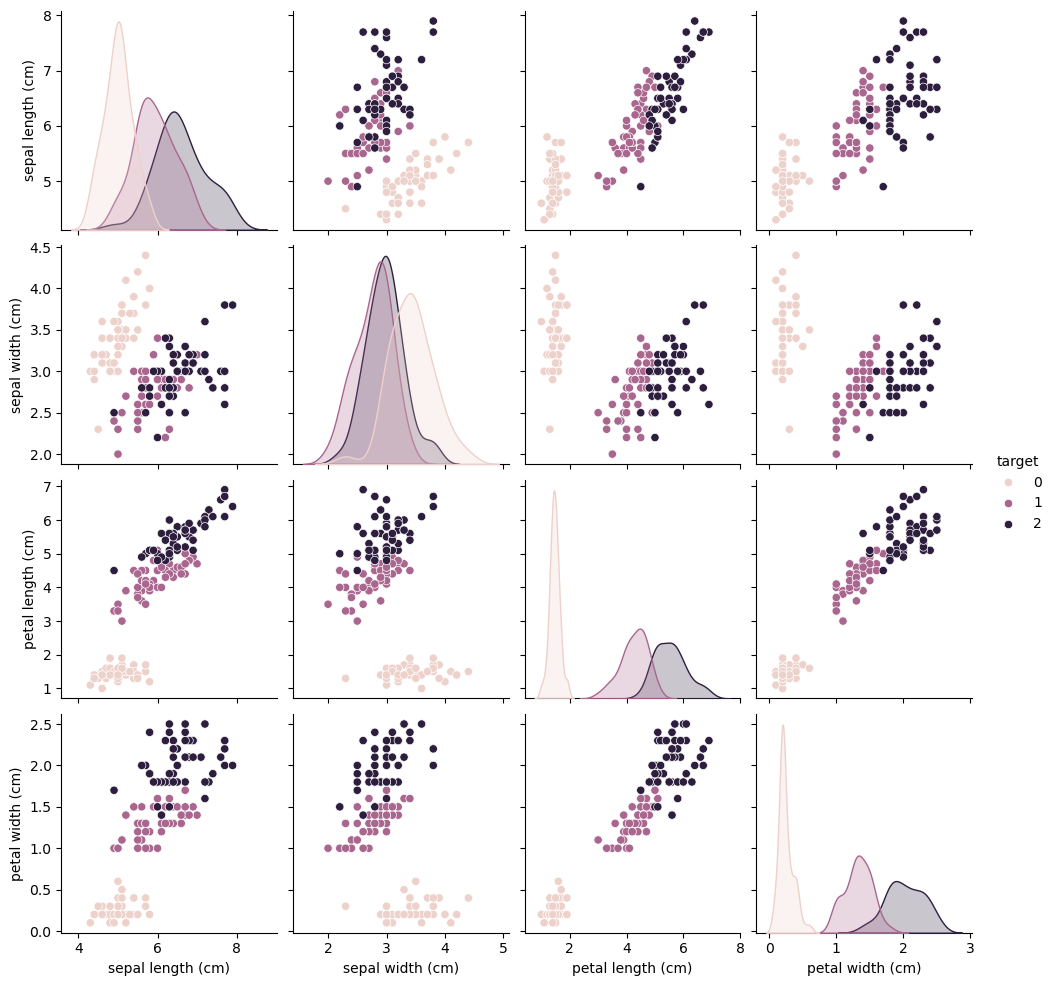

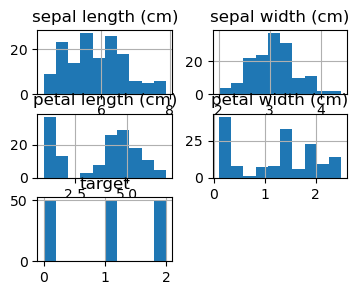

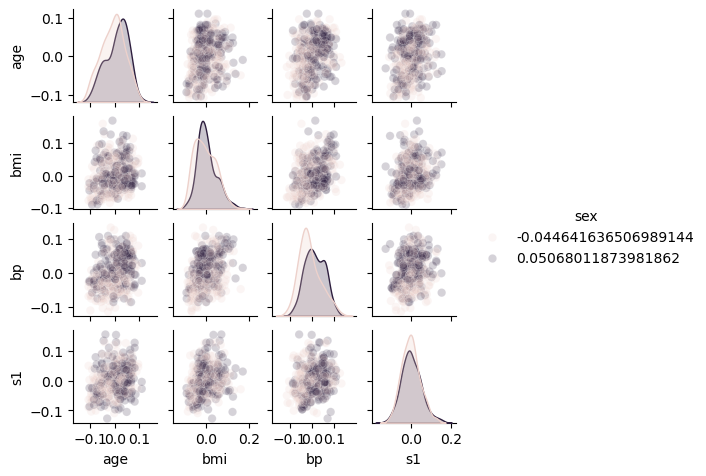

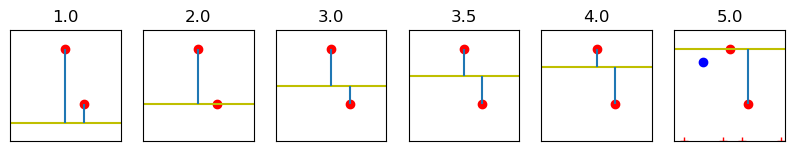

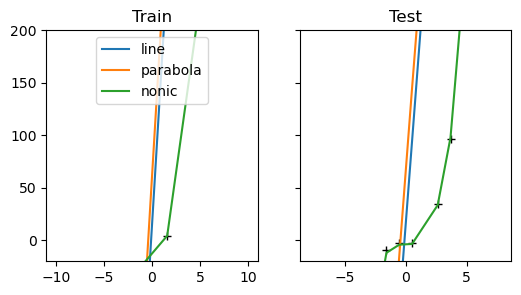

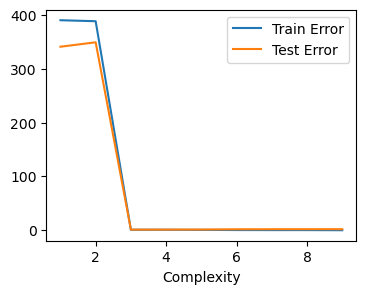

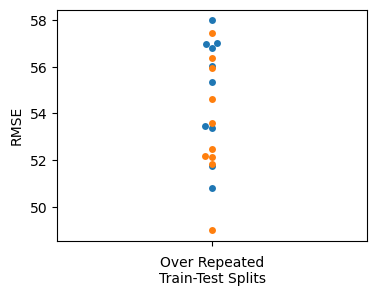

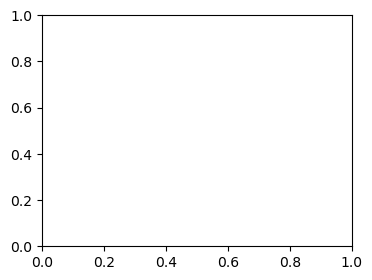

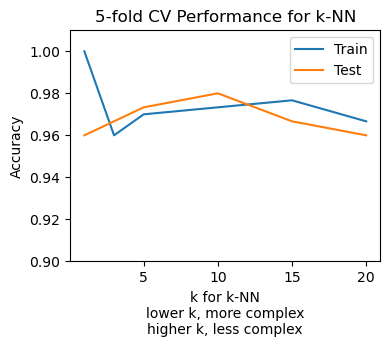

In [67]:
from sklearn.model_selection import validation_curve


num_neigh = [1, 3, 5, 10, 15, 20]
KNC = neighbors.KNeighborsClassifier

# Perform validation curve
tt = validation_curve(KNC(), iris.data, iris.target,
                      param_name='n_neighbors',
                      param_range=num_neigh,
                      cv=5)

# Stack and transpose trick
train_scores_mean = np.mean(tt[0], axis=1)
test_scores_mean = np.mean(tt[1], axis=1)

# Plotting
plt.figure()
sns.lineplot(x=num_neigh, y=train_scores_mean, label='Train')
sns.lineplot(x=num_neigh, y=test_scores_mean, label='Test')
plt.title('5-fold CV Performance for k-NN')
plt.xlabel("\n".join(['k for k-NN', 'lower k, more complex', 'higher k, less complex']))
plt.ylim(.9, 1.01)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
# Setup
from mlwpy import *
%matplotlib inline
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,
diabetes.target,
test_size=.25,
random_state=42)
(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt,
diabetes_test_tgt) = tts

In [69]:
baseline = dummy.DummyRegressor(strategy='mean')
baseline.fit(diabetes_train_ftrs, diabetes_train_tgt)
base_preds = baseline.predict(diabetes_test_ftrs)
# r2 is not symmetric because true values have priority
# and are used to compute target mean
base_r2_sklearn = metrics.r2_score(diabetes_test_tgt, base_preds)
print(base_r2_sklearn)

-0.014016723490579253


In [70]:
# sklearn-train-mean to predict test tgts
base_errors = base_preds - diabetes_test_tgt
sse_base_preds = np.dot(base_errors, base_errors)
# train-mean to predict test targets
train_mean_errors = np.mean(diabetes_train_tgt) - diabetes_test_tgt
sse_mean_train = np.dot(train_mean_errors, train_mean_errors)
# test-mean to predict test targets (Danger Will Robinson!)
test_mean_errors = np.mean(diabetes_test_tgt) - diabetes_test_tgt
sse_mean_test = np.dot(test_mean_errors, test_mean_errors)
print("sklearn train-mean model SSE(on test):", sse_base_preds)
print(" manual train-mean model SSE(on test):", sse_mean_train)
print(" manual test-mean model SSE(on test):", sse_mean_test)

sklearn train-mean model SSE(on test): 622398.9703179051
 manual train-mean model SSE(on test): 622398.9703179051
 manual test-mean model SSE(on test): 613795.5675675676


In [71]:
1 - (sse_base_preds / sse_mean_test)

-0.014016723490578809

In [72]:
print(base_r2_sklearn)
print(1 - (sse_base_preds / sse_mean_test))

-0.014016723490579253
-0.014016723490578809


In [73]:
#
# WARNING!
#Don't try this at home, boys and girls!
# We are fitting on the *test* set... to mimic the behavior
# of sklearn R^2.
#
testbase = dummy.DummyRegressor(strategy='mean')
testbase.fit(diabetes_test_ftrs, diabetes_test_tgt)
testbase_preds = testbase.predict(diabetes_test_ftrs)
testbase_mse = metrics.mean_squared_error(testbase_preds, diabetes_test_tgt)
models = [neighbors.KNeighborsRegressor(n_neighbors=3), linear_model.LinearRegression()]
results = co.defaultdict(dict)

def get_model_name(model):
	return model.__class__.__name__

for m in models:
	preds = (m.fit(diabetes_train_ftrs, diabetes_train_tgt)
			 .predict(diabetes_test_ftrs))
	mse = metrics.mean_squared_error(preds, diabetes_test_tgt)
	r2 = metrics.r2_score(diabetes_test_tgt, preds)
	results[get_model_name(m)]['R^2'] = r2
	results[get_model_name(m)]['MSE'] = mse

print(testbase_mse)

df = pd.DataFrame(results).T
df['Norm_MSE'] = df['MSE'] / testbase_mse
df['1-R^2'] = 1-df['R^2']
display(df)

5529.689797906013


,R^2,MSE,Norm_MSE,1-R^2
KNeighborsRegressor,0.3722,"3,471.4194",0.6278,0.6278
LinearRegression,0.4849,"2,848.3107",0.5151,0.5151


In [74]:
ape_df = pd.DataFrame({'predicted': [4, 2, 9],
					   'actual': [3, 5, 7]})
ape_df['error'] = ape_df['predicted'] - ape_df['actual']
ape_df.index.name = 'example'
display(ape_df)

,predicted,actual,error
example,,,
0,4,3,1
1,2,5,-3
2,9,7,2


In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

def regression_errors(figsize, predicted, actual, errors='all'):
	''' figsize -> subplots;
	predicted/actual data -> columns in a DataFrame
	errors -> "all" or sequence of indices '''
	fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=True, sharey=True)
	df = pd.DataFrame({'actual': actual, 'predicted': predicted})
	for ax, (x, y) in zip(axes, it.permutations(['actual', 'predicted'])):
		# plot the data as '.'; perfect as y=x line
		ax.plot(df[x], df[y], '.', label='data')
		ax.plot(df['actual'], df['actual'], '-', label='perfection')
		ax.legend()
		ax.set_xlabel('{} Value'.format(x.capitalize()))
		ax.set_ylabel('{} Value'.format(y.capitalize()))
		ax.set_aspect('equal')
	axes[1].yaxis.tick_right()
	axes[1].yaxis.set_label_position("right")
	# show connecting bars from data to perfect
	# for all or only those specified?
	if errors == 'all':
		errors = range(len(df))
	if errors:
		acts = df.actual.iloc[errors]
		preds = df.predicted.iloc[errors]
		axes[0].vlines(acts, preds, acts, 'r')
		axes[1].hlines(acts, preds, acts, 'r')

regression_errors((6, 3), ape_df.predicted, ape_df.actual)

In [76]:
lr = linear_model.LinearRegression()
preds = (lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
		 .predict(diabetes_test_ftrs))
regression_errors((8, 4), preds, diabetes_test_tgt, errors=[-20])